In [1]:
import pandas as pd
import textblob
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def analyze_sentiment(text):
    blob = textblob.TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity < -0.2:
        return "negative"
    elif polarity > 0.2:
        return "positive"
    else:
        return "neutral"

def run_tests():
    positive_tests = ["Happy", "Exciting", "good", "rich", "smile"]
    negative_tests = ["Sad", "disappointed", "bad", "poor", "anger"]
    neutral_tests = ["food", "animal"]

    for word in positive_tests:
        assert analyze_sentiment(word) == "positive", f"Word: {word} - Expected: positive"

    for word in negative_tests:
        assert analyze_sentiment(word) == "negative", f"Word: {word} - Expected: negative"

    for word in neutral_tests:
        assert analyze_sentiment(word) == "neutral", f"Word: {word} - Expected: neutral"

    print("All tests passed")

run_tests()

All tests passed


In [7]:
df = pd.read_csv("/content/data.csv")

productDF = df[df["id"] == "AVqkIhwDv8e3D1O-lebb"]
productDF.head()

<ipython-input-7-56e19e62b5d1>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data.csv")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [8]:
relevant_columns = ['id', 'name', 'reviews.text', 'reviews.rating']
productDF = productDF[relevant_columns]

In [11]:
productDF["sentiment"] = productDF["reviews.text"].apply(analyze_sentiment)


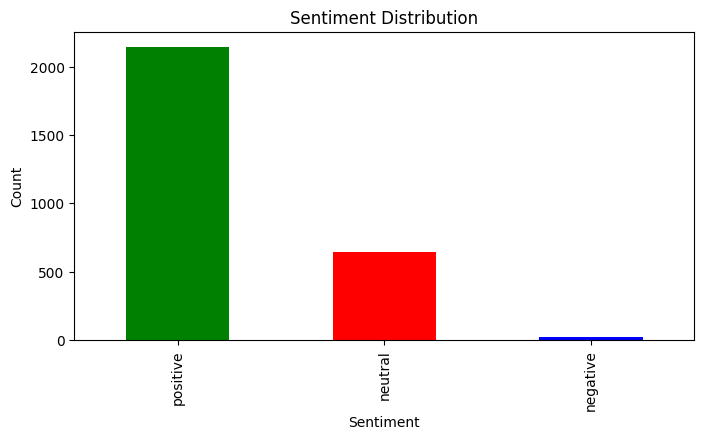

In [12]:
plt.figure(figsize=(8, 4))
productDF["sentiment"].value_counts().plot(kind="bar", color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

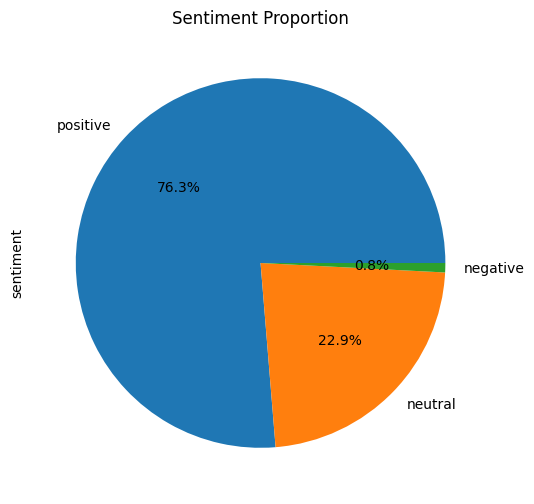

In [13]:
plt.figure(figsize=(6, 6))
productDF["sentiment"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Sentiment Proportion")
plt.show()

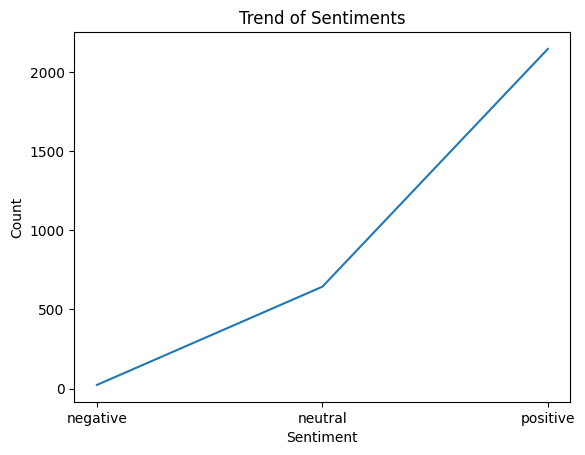

In [14]:
sns.lineplot(data=productDF["sentiment"].value_counts().sort_index())
plt.title("Trend of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

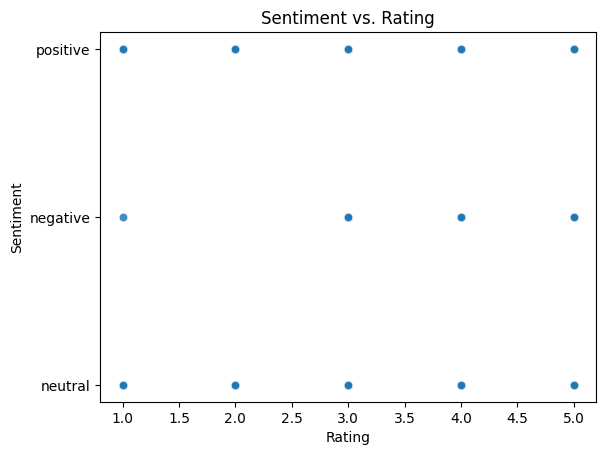

In [15]:
sns.scatterplot(data=productDF, x="reviews.rating", y="sentiment", alpha=0.6)
plt.title("Sentiment vs. Rating")
plt.xlabel("Rating")
plt.ylabel("Sentiment")
plt.show()

In [16]:
print("Product Name:", productDF["name"].iloc[0])
print("Number of reviews:", len(productDF))
print("Number of positive reviews:", len(productDF[productDF["sentiment"] == "positive"]))
print("Number of negative reviews:", len(productDF[productDF["sentiment"] == "negative"]))


Product Name: All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta
Number of reviews: 2814
Number of positive reviews: 2147
Number of negative reviews: 23


In [17]:
productDF.to_csv("product_modified.csv")
